In [198]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import kagglehub
from pathlib import Path
import pandas as pd
import os
from typing import Dict

In [188]:
path_data_students = Path(kagglehub.dataset_download("lainguyn123/student-performance-factors"))
path_data_visualization = Path(kagglehub.dataset_download("alexisbcook/data-for-datavis"))

In [189]:
data_students = pd.read_csv(path_data_students / "StudentPerformanceFactors.csv")
data_students

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [190]:
data_visualization = pd.read_csv(path_data_visualization / "cancer.csv")
print(data_visualization.keys())
data_visualization

Index(['Id', 'Diagnosis', 'Radius (mean)', 'Texture (mean)',
       'Perimeter (mean)', 'Area (mean)', 'Smoothness (mean)',
       'Compactness (mean)', 'Concavity (mean)', 'Concave points (mean)',
       'Symmetry (mean)', 'Fractal dimension (mean)', 'Radius (se)',
       'Texture (se)', 'Perimeter (se)', 'Area (se)', 'Smoothness (se)',
       'Compactness (se)', 'Concavity (se)', 'Concave points (se)',
       'Symmetry (se)', 'Fractal dimension (se)', 'Radius (worst)',
       'Texture (worst)', 'Perimeter (worst)', 'Area (worst)',
       'Smoothness (worst)', 'Compactness (worst)', 'Concavity (worst)',
       'Concave points (worst)', 'Symmetry (worst)',
       'Fractal dimension (worst)'],
      dtype='object')


,Id,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926125,M,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873
565,926424,M,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
566,926682,M,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
567,926954,M,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820


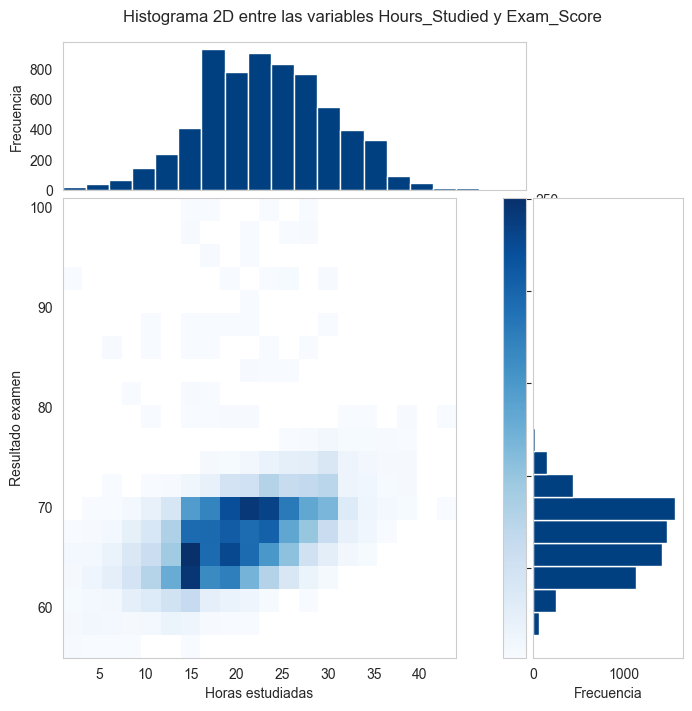

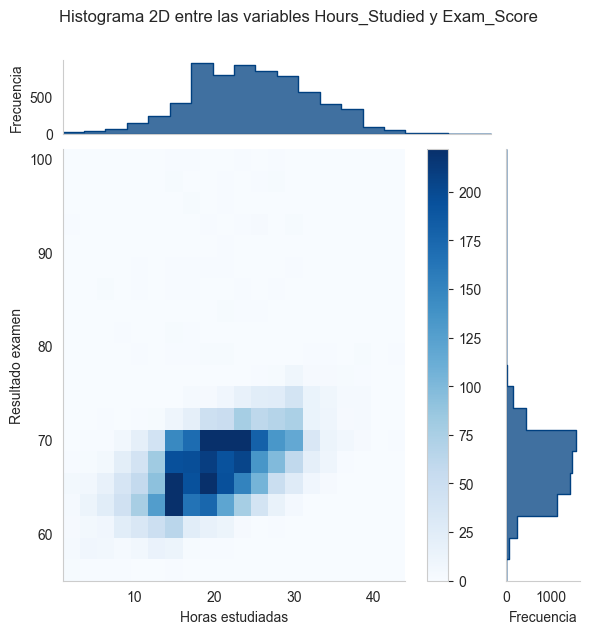

In [191]:
# Realizaremos un histograma 2D entre las variables Hours_Studied y Exam_Score

# Matplotlib
# Crear la figura y los subgráficos
fig = plt.figure(figsize=(8, 8))
grid = fig.add_gridspec(4, 4, hspace=0.05, wspace=0.05)

# Crear el gráfico principal 2D (heatmap) en el centro
ax_main = fig.add_subplot(grid[1:4, 0:3])
hb = ax_main.hist2d(data_students.Hours_Studied, data_students.Exam_Score, bins=20, cmap="Blues", cmin=1)
plt.colorbar(hb[3], ax=ax_main, orientation='vertical', fraction=0.05, pad=0.1, label="Frecuencia")

# Crear el histograma marginal para el eje X (Hours_Studied)
ax_xhist = fig.add_subplot(grid[0, 0:3], sharex=ax_main)
ax_xhist.hist(data_students.Hours_Studied, bins=20, color="#004080")
ax_xhist.set_ylabel("Frecuencia")
ax_xhist.tick_params(axis="x", labelbottom=False)

# Crear el histograma marginal para el eje Y (Exam_Score)
ax_yhist = fig.add_subplot(grid[1:4, 3], sharey=ax_main)
ax_yhist.hist(data_students.Exam_Score, bins=20, color="#004080", orientation='horizontal')
ax_yhist.set_xlabel("Frecuencia")
ax_yhist.tick_params(axis="y", labelleft=False)

# Etiquetas y título
ax_main.set_xlabel("Horas estudiadas")
ax_main.set_ylabel("Resultado examen")
fig.suptitle("Histograma 2D entre las variables Hours_Studied y Exam_Score", y=0.92)

plt.show()


# Seaborn
g = sns.JointGrid(data=data_students, x="Hours_Studied", y="Exam_Score", marginal_ticks=True)
g.fig.suptitle("Histograma 2D entre las variables Hours_Studied y Exam_Score", y=1.05)
g.plot_joint(
    sns.histplot,
    cmap="Blues", pmax=.8, cbar=True, bins=20,
    thresh=None
)
g.plot_marginals(sns.histplot, element="step", color="#004080", bins=20)
g.ax_joint.set_xlabel("Horas estudiadas")
g.ax_joint.set_ylabel("Resultado examen")
g.ax_marg_x.set_ylabel("Frecuencia")
g.ax_marg_y.set_xlabel("Frecuencia")
g.ax_marg_x.yaxis.label.set_visible(True)
g.ax_marg_y.xaxis.label.set_visible(True)
plt.show()


# Plotly
# Crear el gráfico con subplots
fig = make_subplots(
    rows=2, cols=2,
    shared_xaxes=True, shared_yaxes=True,
    column_widths=[0.8, 0.2], row_heights=[0.2, 0.8],
    specs=[[{"type": "histogram"}, None],
           [{"type": "histogram2d"}, {"type": "histogram"}]]
)

# Histograma marginal en el eje X
fig.add_trace(
    go.Histogram(
        x=data_students.Hours_Studied,
        nbinsx=30,
        marker_color="#004080",
        showlegend=False,
    ),
    row=1, col=1
)

# Histograma 2D
fig.add_trace(
    go.Histogram2d(
        x=data_students.Hours_Studied,
        y=data_students.Exam_Score,
        colorscale="Blues",
        colorbar=dict(title="Frecuencia"),
        nbinsx=30, nbinsy=30
    ),
    row=2, col=1
)

# Histograma marginal en el eje Y
fig.add_trace(
    go.Histogram(
        y=data_students.Exam_Score,
        nbinsy=30,
        marker_color="#004080",
        showlegend=False,
        orientation="h"
    ),
    row=2, col=2
)

# Ajustes de ejes y títulos
fig.update_xaxes(title_text="Horas estudiadas", row=2, col=1)
fig.update_yaxes(title_text="Resultado examen", row=2, col=1)
fig.update_yaxes(title_text="Frecuencia", row=1, col=1)
fig.update_xaxes(title_text="Frecuencia", row=2, col=2)

# Título general
fig.update_layout(
    title_text="Histograma 2D entre las variables Hours_Studied y Exam_Score",
    title_x=0.5,
    showlegend=False,
    height=600, width=600
)

fig.show()

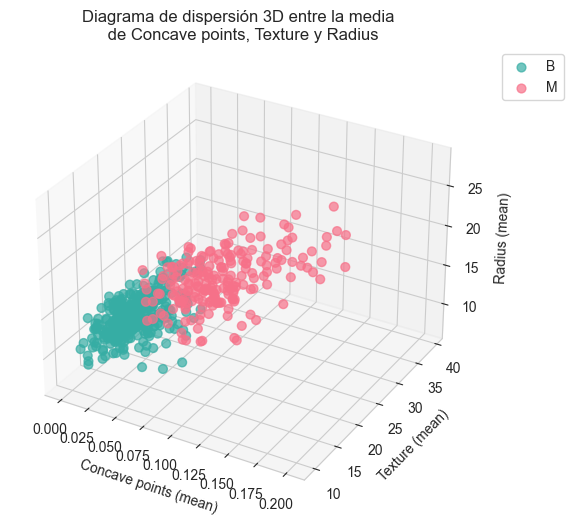

In [201]:
# A continuación, vamos a realizar un gráfico de dispersión 3D entre las variables Attendance, Hours_Studied y Exam_Score.

#------------
# Matplotlib
#------------


# Crear la figura y el eje 3D
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

# Crear el colormap con dos colores para las categorías "M" y "B"
cmap = ListedColormap(sns.color_palette("husl", 2).as_hex())

# Filtrar los datos por categorías para cada grupo
data_B = data_visualization[data_visualization["Diagnosis"] == "B"]
data_M = data_visualization[data_visualization["Diagnosis"] == "M"]

# Graficar puntos para categoría "B"
sc_B = ax.scatter(
    data_B["Concave points (mean)"], 
    data_B["Texture (mean)"], 
    data_B["Radius (mean)"], 
    s=40, color=cmap(1), label="B", marker='o', alpha=0.7
)

# Graficar puntos para categoría "M"
sc_M = ax.scatter(
    data_M["Concave points (mean)"], 
    data_M["Texture (mean)"], 
    data_M["Radius (mean)"], 
    s=40, color=cmap(0), label="M", marker='o', alpha=0.7
)

# Etiquetas de los ejes
ax.set_xlabel('Concave points (mean)')
ax.set_ylabel('Texture (mean)')
ax.set_zlabel('Radius (mean)')
ax.set_title("Diagrama de dispersión 3D entre la media \n de Concave points, Texture y Radius")

# Añadir la leyenda
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

# Guardar la figura
plt.savefig("scatter_hue", bbox_inches='tight')
plt.show()


#--------
# Plotly
#--------
fig = px.scatter_3d(data_visualization, 
                    x="Concave points (mean)", y="Texture (mean)", z="Radius (mean)", color="Diagnosis",
                    opacity=.7)
fig.update_traces(marker_size=3)
fig.update_layout(
    title_text="Diagrama de dispersión 3D entre la media <br> de Concave points, Texture y Radius",
    height=600, width=600
)
fig.show()
